In [6]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df = pd.read_csv(url)

In [8]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [9]:
#let's focus on a few variables 
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


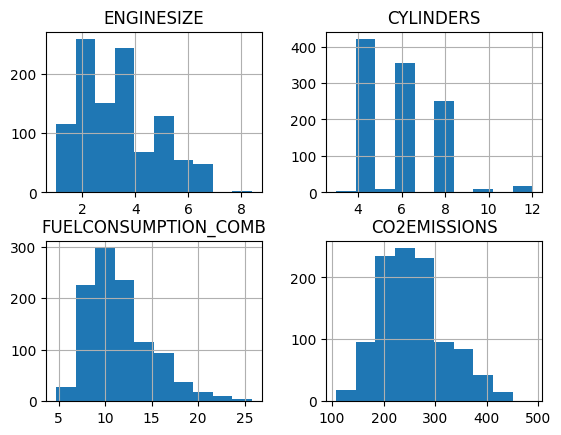

In [14]:
cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']].hist()
plt.show() #in some environment the histograms will not be shown without plt.show()

Text(0, 0.5, 'CO2 Emissions')

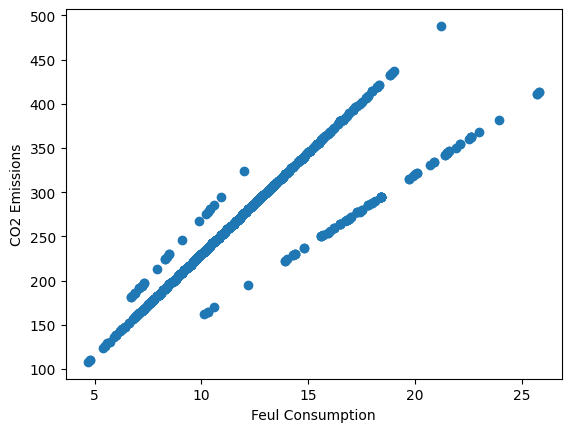

In [17]:
plt.scatter(cdf[['FUELCONSUMPTION_COMB']], cdf[['CO2EMISSIONS']])
plt.xlabel('Feul Consumption')
plt.ylabel('CO2 Emissions')

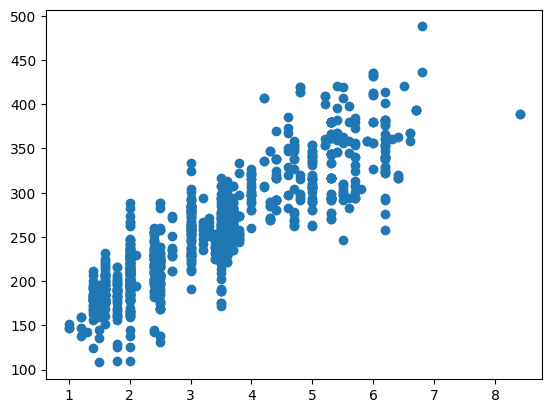

In [18]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS)

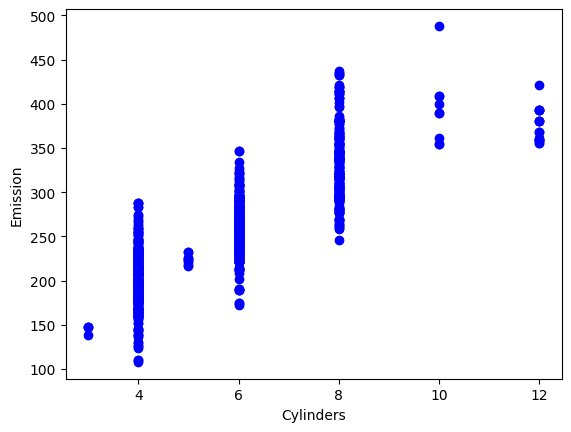

In [19]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

Let's first deivide data to 80% for training and 20% for testing


In [38]:
msk =np.random.rand(len(df)) < .8
train=cdf[msk]
test = cdf[~msk]

In [39]:
#ow let's make a simple linear regression using scikit learn 
from sklearn import linear_model

In [40]:
regr = linear_model.LinearRegression()

In [44]:
train_x = train[['ENGINESIZE']]
train_y = train[['CO2EMISSIONS']]

In [45]:
regr.fit(train_x,train_y)

LinearRegression()

In [46]:
#regression coefficiet
regr.coef_

array([[38.74593767]])

In [47]:
#intercept
regr.intercept_

array([126.49086273])

In [48]:
#MAE (mean absolute error) as one evaluation metrics 
# to calculate MAE we first get the predictions of the model them subtract them from values of test set
test_x = test[['ENGINESIZE']]
predictions= regr.predict(test_x)


In [51]:
test_y = test[['CO2EMISSIONS']]
MAE = np.mean(np.absolute(predictions - test_y))
MAE

c:\Users\17063\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


CO2EMISSIONS    23.725155
dtype: float64